In [7]:
# A Whale off the Port(folio)

# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline  


# Set dataframes for Whale Returns
whale_returns = Path("../panda-homework-main/whale_returns.csv")

# Read CSV, index "date" column as datetime format.
whale_returns = pd.read_csv(whale_returns, index_col="Date", parse_dates=True)

# Whale Returns
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [8]:
 # Count nulls for Whale Returns
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

 

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [10]:
# Set datafromes for Algo Returns
algo_returns = Path("../panda-homework-main/algo_returns.csv")

# Read CSV file, index 'date' column as datetime format
algo_returns = pd.read_csv(algo_returns, index_col="Date", parse_dates=True)

# Algo Returns
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [11]:
# Count nulls for Algo Returns
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop Nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

In [14]:
# Set dataframe for S&P 500 TSX 
sp_tsx_history = Path("../panda-homework-main/sp_tsx_history.csv")

# Read CSV file index 'date' column as datetime format
sp_tsx_history = pd.read_csv(sp_tsx_history, index_col="Date", parse_dates=True)

# S&P 500 TSX returns
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [15]:
# Remove '$' from Close column
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(",", "")
sp_tsx_history.head()

<ipython-input-15-685de268ef67>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [16]:
sp_tsx_history.dtypes

Close    object
dtype: object

In [17]:
# Convert "Close" from 'object' to 'float'
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype("float")
sp_tsx_history.head()
sp_tsx_history.dtypes

Close    float64
dtype: object

In [18]:
sp_tsx_history["Close"] = sp_tsx_history["Close"].pct_change()
sp_tsx_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [19]:
# Count  nulls
sp_tsx_history.isnull().sum()

Close    1
dtype: int64

In [20]:
# Remove nulls
sp_tsx_history.dropna(inplace=True)

In [21]:
# Rename column

sp_tsx_history.columns = ["S&P TSX"]
sp_tsx_history.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [22]:
# Combine dataframes

combined_data = pd.concat([whale_returns, algo_returns, sp_tsx_history], axis="columns", join="inner")
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


In [23]:
# Drop Nulls

combined_data.dropna(inplace=True)
combined_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
dtype: int64

In [24]:
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:xlabel='Date'>

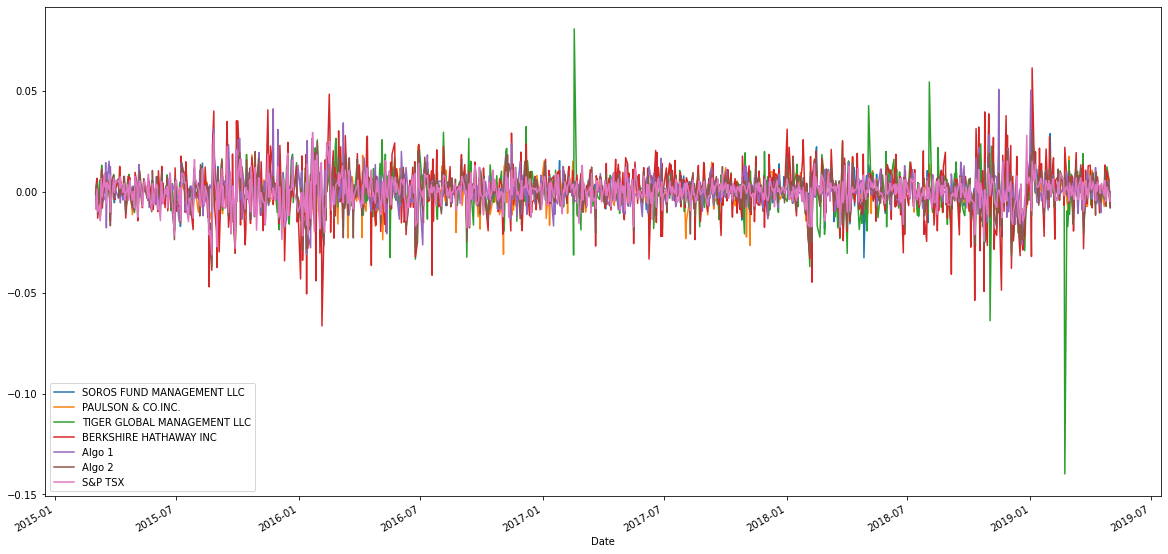

In [25]:
# Daily returns
combined_data.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

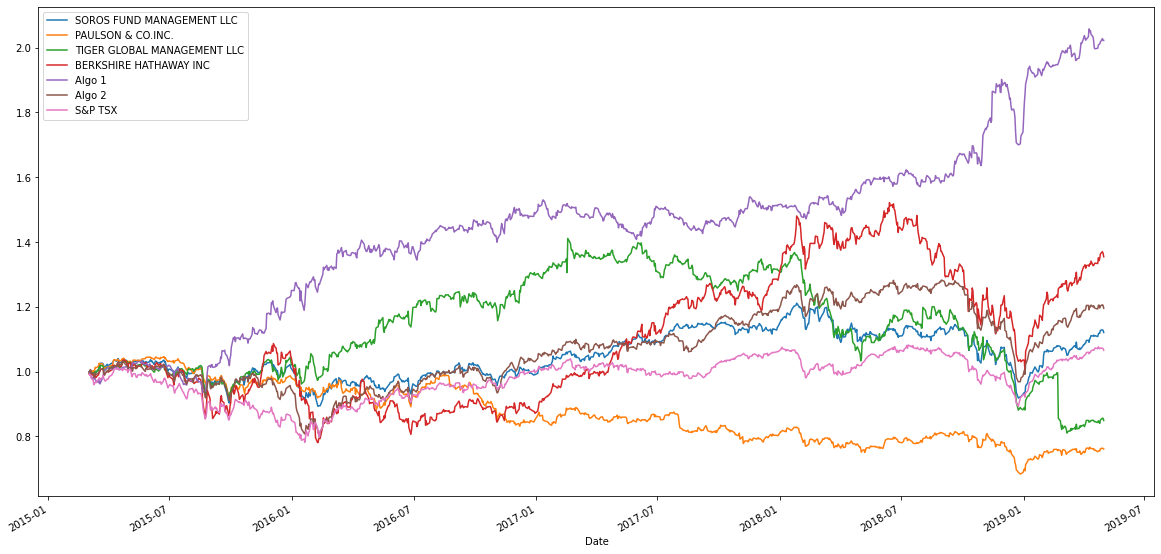

In [26]:
# Cumulative returns
combined_cumulative = (1 + combined_data).cumprod()
combined_cumulative.plot(figsize = (20,10))

<AxesSubplot:>

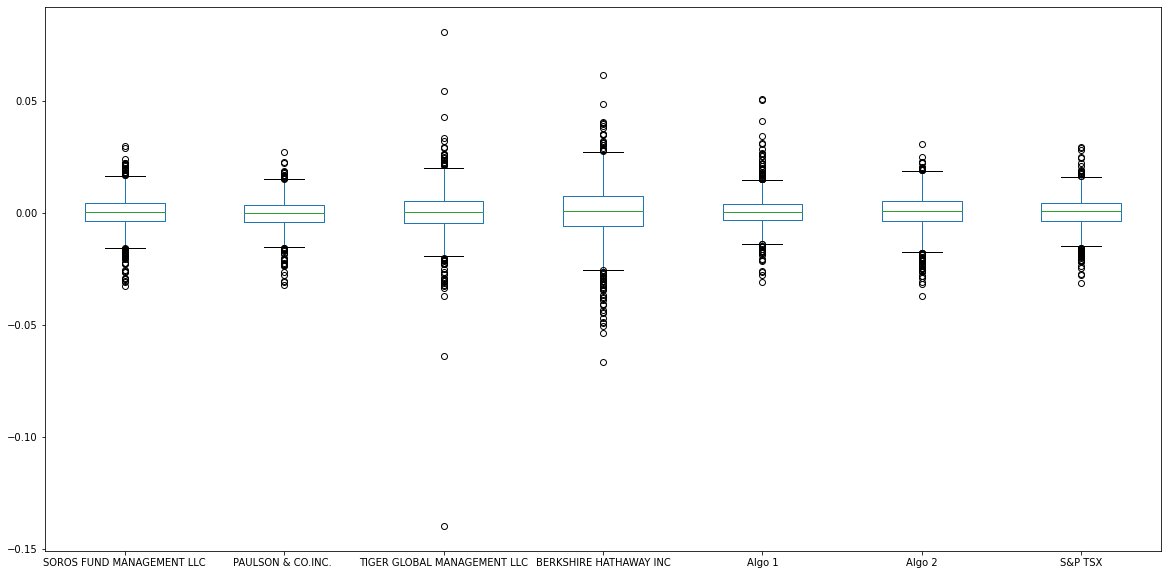

In [27]:
# Box plot for each of the returns
combined_data.plot.box(figsize=(20,10))

In [28]:
# Daily standard deviation of all portfolios
std_daily = combined_data.std()
print(std_daily)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64


In [ ]:
# ^ Soros, Tiger, Berkshire, Algo 1, and Algo 2 all have standard deviations greater than the S&P TSX therefore they are riskier. 

In [29]:
# Calculate annualized standard deviation for 252 trading days
annualized_std = std_daily * np.sqrt(252)
print(annualized_std)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64


<AxesSubplot:xlabel='Date'>

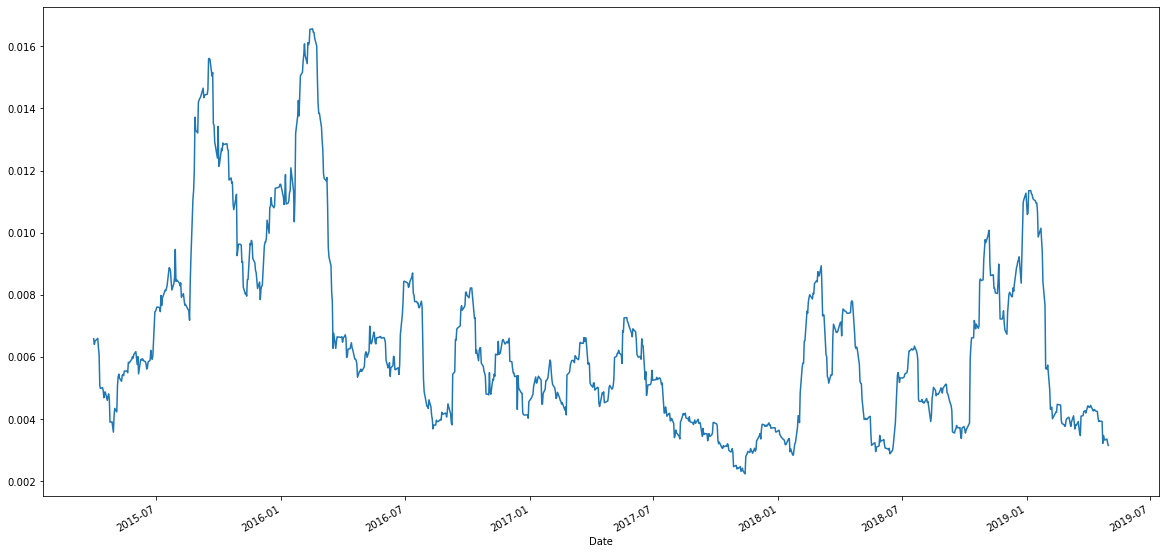

In [30]:
# Rolling standard deviation for S&P TSX over 21 day period
combined_data["S&P TSX"].rolling(window=21).std().plot(figsize=(20,10))

In [31]:
# Correlation for each stock
correlation = combined_data.corr()
correlation.head(10) 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [32]:
# Covariance of Algo 1
soros_cov = combined_data["SOROS FUND MANAGEMENT LLC"].cov(combined_data["S&P TSX"])
soros_cov

3.710689907855224e-05

In [33]:
# Variance of S&P TSX
variance = combined_data["S&P TSX"].var()
variance

4.9479515915131015e-05

In [34]:
# Calculate Beta
soros_beta = soros_cov / variance
soros_beta

0.7499446668435334

In [35]:
# Determine Sharpe Ratios
sharpe_ratios = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

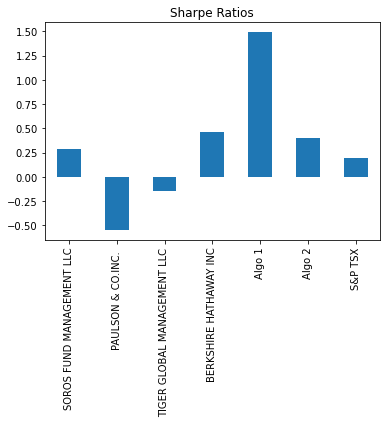

In [36]:
sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [ ]:
# Algo 1 outperforms however Algo 2 does not outperform Berkshire.


In [37]:
# Exponentially Weighted Average

combined_data.ewm(halflife=21).std().head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517


In [206]:
# Three Stock Portfolio

# Netflix

nflx_data = Path("./panda-homework-main/NFLX.csv")

nflx_data = pd.read_csv(nflx_data, index_col="Date", parse_dates=True)

nflx_data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100
2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200
2019-01-09,317.709991,323.350006,313.500000,319.959991,319.959991,13343200
2019-01-10,314.570007,325.369995,312.500000,324.660004,324.660004,13472500
2019-01-11,330.959991,341.089996,328.519989,337.589996,337.589996,19500400


In [207]:
# Drop Columns

nflx_data.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close'], inplace=True)
nflx_data

,Close
Date,
2019-01-07,315.339996
2019-01-08,320.269989
2019-01-09,319.959991
2019-01-10,324.660004
2019-01-11,337.589996
...,...
2021-03-01,550.640015
2021-03-02,547.820007
2021-03-03,520.700012


In [208]:
# Rename column

nflx_data.columns = ["NFLX"]
nflx_data

,NFLX
Date,
2019-01-07,315.339996
2019-01-08,320.269989
2019-01-09,319.959991
2019-01-10,324.660004
2019-01-11,337.589996
...,...
2021-03-01,550.640015
2021-03-02,547.820007
2021-03-03,520.700012


In [209]:
# Tesla

tesla_data = Path("./panda-homework-main/TSLA.csv")

tesla_data = pd.read_csv(tesla_data, index_col="Date", parse_dates=True)

tesla_data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000
2019-01-08,68.391998,68.802002,65.403999,67.070000,67.070000,35042500
2019-01-09,67.099998,68.699997,66.293999,67.706001,67.706001,27164500
2019-01-10,66.879997,69.078003,66.358002,68.994003,68.994003,30282000
2019-01-11,68.417999,69.681999,67.753998,69.452003,69.452003,25195500


In [210]:
# Drop columns

tesla_data.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close'], inplace=True)
tesla_data

,Close
Date,
2019-01-07,66.991997
2019-01-08,67.070000
2019-01-09,67.706001
2019-01-10,68.994003
2019-01-11,69.452003
...,...
2021-03-01,718.429993
2021-03-02,686.440002
2021-03-03,653.200012


In [211]:
# Rename column

tesla_data.columns = ["TSLA"]
tesla_data

,TSLA
Date,
2019-01-07,66.991997
2019-01-08,67.070000
2019-01-09,67.706001
2019-01-10,68.994003
2019-01-11,69.452003
...,...
2021-03-01,718.429993
2021-03-02,686.440002
2021-03-03,653.200012


In [241]:
# Exxon

exxon_data = Path("./panda-homework-main/XOM.csv")

exxon_data = pd.read_csv(exxon_data, index_col="Date", parse_dates=True)

exxon_data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-07,71.250000,72.099998,70.739998,71.519997,62.148109,10844200
2019-01-08,72.540001,72.589996,71.940002,72.040001,62.599968,11439000
2019-01-09,72.599998,72.599998,71.650002,72.419998,62.930176,13473500
2019-01-10,72.070000,72.080002,71.120003,72.050003,62.608669,13151100
2019-01-11,71.849998,71.889999,71.070000,71.720001,62.321911,9790100


In [213]:
# Drop column

exxon_data.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close'], inplace=True)
exxon_data

,Close
Date,
2019-01-07,71.519997
2019-01-08,72.040001
2019-01-09,72.419998
2019-01-10,72.050003
2019-01-11,71.720001
...,...
2021-03-01,56.400002
2021-03-02,56.070000
2021-03-03,56.520000


In [214]:
# Rename columnm

exxon_data.columns = ["XOM"]
exxon_data

,XOM
Date,
2019-01-07,71.519997
2019-01-08,72.040001
2019-01-09,72.419998
2019-01-10,72.050003
2019-01-11,71.720001
...,...
2021-03-01,56.400002
2021-03-02,56.070000
2021-03-03,56.520000


In [215]:
# Combine stock data

michaeln_returns = pd.concat([nflx_data, tesla_data, exxon_data], axis='columns', join='inner')
michaeln_returns.columns = ['NFLX', 'TSLA', 'XOM']
michaeln_returns_done = michaeln_returns.sort_index().pct_change()
michaeln_returns_done.head()

,NFLX,TSLA,XOM
Date,,,
2019-01-07,NaN,NaN,NaN
2019-01-08,0.015634,0.001164,0.007271
2019-01-09,-0.000968,0.009483,0.005275
2019-01-10,0.014689,0.019023,-0.005109
2019-01-11,0.039826,0.006638,-0.004580


In [216]:
# Drop Nulls

michaeln_returns_done.dropna(inplace=True)
michaeln_returns_done.head()

,NFLX,TSLA,XOM
Date,,,
2019-01-08,0.015634,0.001164,0.007271
2019-01-09,-0.000968,0.009483,0.005275
2019-01-10,0.014689,0.019023,-0.005109
2019-01-11,0.039826,0.006638,-0.004580
2019-01-14,-0.013774,-0.037033,-0.001255


In [217]:
# Apply weighted averages

weights = [1/3, 1/3, 1/3]
weighted_returns = michaeln_returns_done.dot(weights)
weighted_returns.sum()


1.1451976037009974

In [245]:
# Cumulative returns based off of weights

michaeln_cumulative = (1 + weighted_returns).cumprod()-1
michaeln_cumulative.sum()

232.5852181370596

In [221]:
# Join Part 1 and Part 2 into one table

all_portfolios = pd.concat([combined_data, michaeln_cumulative], axis='columns', join='outer')
all_portfolios.rename(columns={0:'Michael N'}, inplace=True)
all_portfolios.dropna(inplace=True)
all_portfolios.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Michael N
Date,,,,,,,,
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.006965,0.008023
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.013665,0.012656
2019-01-10,0.002869,-0.000388,0.007423,0.003163,0.003087,0.003366,0.006671,0.022312
2019-01-11,0.011190,0.004232,0.002051,-0.002152,-0.005112,0.003885,0.002395,0.036585
2019-01-14,-0.001999,-0.005161,0.007798,-0.001253,-0.005642,-0.006659,0.002433,0.018596


In [223]:
# Annualized Standard Deviation

all_portfolios_std = all_portfolios.std() * np.sqrt(252)
all_portfolios_std

SOROS FUND MANAGEMENT LLC      0.104612
PAULSON & CO.INC.              0.094820
TIGER GLOBAL MANAGEMENT LLC    0.277662
BERKSHIRE HATHAWAY INC         0.160023
Algo 1                         0.076894
Algo 2                         0.104519
S&P TSX                        0.066205
Michael N                      0.358865
dtype: float64

<AxesSubplot:xlabel='Date'>

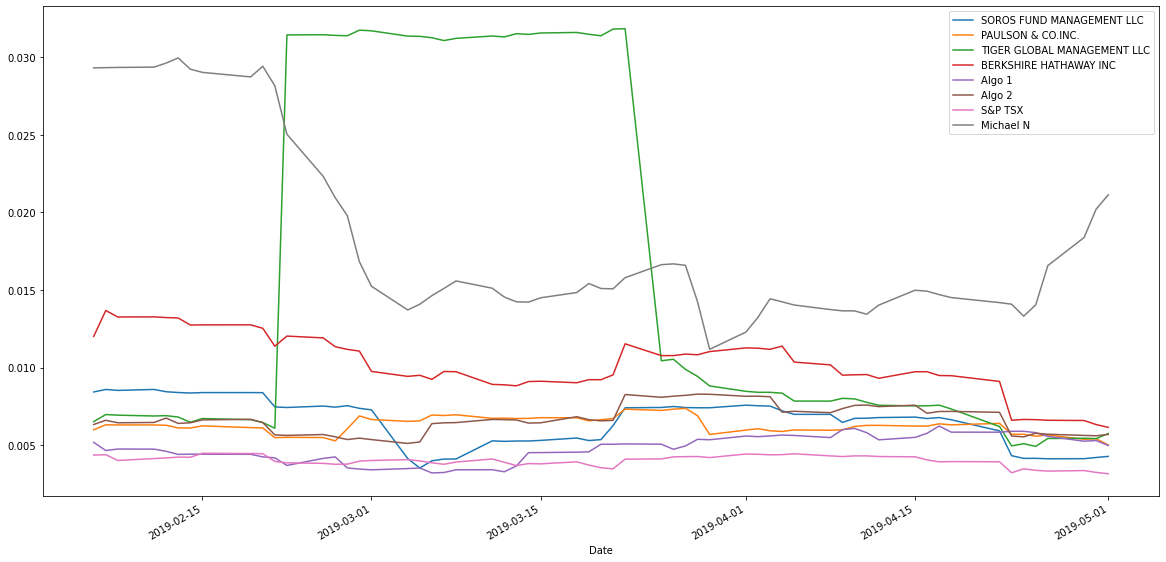

In [235]:
# Rolling Standard Deviation with 21 day window

all_portfolios.rolling(window=21).std().plot(figsize=(20,10))

In [237]:
# Correlation

new_correlation = all_portfolios.corr()
new_correlation.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Michael N
SOROS FUND MANAGEMENT LLC,1.000000,0.684725,0.296023,0.662673,-0.036059,0.757320,0.584225,0.118152
PAULSON & CO.INC.,0.684725,1.000000,0.189414,0.479940,-0.011549,0.640446,0.322265,0.092344
TIGER GLOBAL MANAGEMENT LLC,0.296023,0.189414,1.000000,0.009482,-0.064011,0.104464,0.190269,-0.041964
BERKSHIRE HATHAWAY INC,0.662673,0.479940,0.009482,1.000000,0.085406,0.689508,0.561043,0.126245
Algo 1,-0.036059,-0.011549,-0.064011,0.085406,1.000000,-0.021745,0.059952,-0.027040
Algo 2,0.757320,0.640446,0.104464,0.689508,-0.021745,1.000000,0.641405,0.202774
S&P TSX,0.584225,0.322265,0.190269,0.561043,0.059952,0.641405,1.000000,0.176529
Michael N,0.118152,0.092344,-0.041964,0.126245,-0.027040,0.202774,0.176529,1.000000


<AxesSubplot:xlabel='S&P TSX', ylabel='Michael N'>

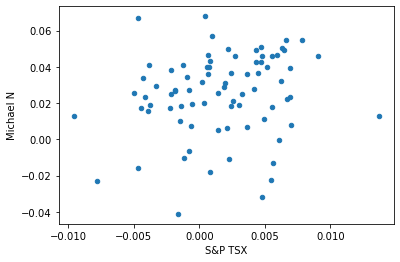

In [239]:
all_portfolios.plot(kind='scatter', x='S&P TSX', y='Michael N')

In [240]:
# Beta vs S&P TSX

new_cov = all_portfolios['Michael N'].cov(all_portfolios['S&P TSX'])
new_var = all_portfolios['S&P TSX'].var()
new_beta = new_cov/new_var
new_beta

0.9568823281600655

In [242]:
# Sharpe Ratios

new_sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
new_sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC      4.634224
PAULSON & CO.INC.              1.772806
TIGER GLOBAL MANAGEMENT LLC   -0.821669
BERKSHIRE HATHAWAY INC         4.580246
Algo 1                         2.289756
dtype: float64

<AxesSubplot:>

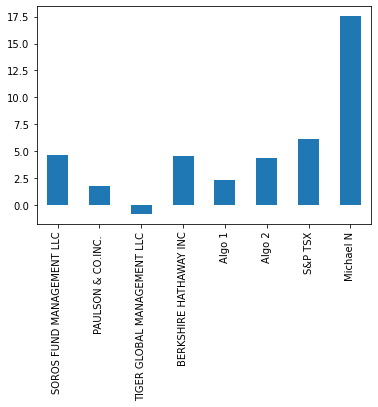

In [244]:
new_sharpe_ratios.plot.bar()

In [246]:
# My portfolio outperforms all other portfolios.